# 1. Importing the modules

In [8]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
import warnings

warnings.filterwarnings("ignore")

In [9]:
import datetime
from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks

np.random.seed(0)

## 1.1 Creating DataFrame

In [10]:
rain = pd.read_csv('/content/weatherVN.csv')
rain.head(10)

,province,t_max,t_min,wind,wind_d,rain,humidi,cloud,pressure,date
0,Bac Lieu,27,22,17,NNE,6.9,90,71,1010.0,2009-01-01
1,Bac Lieu,31,25,20,ENE,0.0,64,24,1010.0,2010-01-01
2,Bac Lieu,29,24,14,E,0.0,75,45,1008.0,2011-01-01
3,Bac Lieu,30,24,30,E,0.0,79,52,1012.0,2012-01-01
4,Bac Lieu,31,25,20,ENE,0.0,70,24,1010.0,2013-01-01
5,Bac Lieu,28,23,14,ENE,0.0,75,55,1012.0,2014-01-01
6,Bac Lieu,29,23,10,ENE,0.4,75,42,1012.0,2015-01-01
7,Bac Lieu,32,24,22,ENE,0.0,63,9,1015.0,2016-01-01
8,Bac Lieu,30,24,20,ENE,0.5,76,35,1011.0,2017-01-01
9,Bac Lieu,29,23,16,E,0.0,70,33,1010.0,2018-01-01


## 1.2 Shape of DataFrame

In [11]:
print(f'The number of rows are {rain.shape[0] } and the number of columns are {rain.shape[1]}')

The number of rows are 89003 and the number of columns are 10


## 1.3 Describing the attributes

In [12]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89003 entries, 0 to 89002
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   province  89003 non-null  object 
 1   t_max     89003 non-null  int64  
 2   t_min     89003 non-null  int64  
 3   wind      89003 non-null  int64  
 4   wind_d    89003 non-null  object 
 5   rain      89003 non-null  float64
 6   humidi    89003 non-null  int64  
 7   cloud     89003 non-null  int64  
 8   pressure  89002 non-null  float64
 9   date      89002 non-null  object 
dtypes: float64(2), int64(5), object(3)
memory usage: 6.8+ MB


## 1.4 Finding all the categorical and continuous values

In [13]:
categorical_col, contin_val=[],[]

for i in rain.columns:
    
    if rain[i].dtype == 'object':
        categorical_col.append(i)
    else:
        contin_val.append(i)
        
print(categorical_col)
print(contin_val)

['province', 'wind_d', 'date']
['t_max', 't_min', 'wind', 'rain', 'humidi', 'cloud', 'pressure']


## 1.5 Unique values

In [14]:
rain.nunique()

province      20
t_max         43
t_min         30
wind          49
wind_d        16
rain        1101
humidi        74
cloud        101
pressure      49
date        4549
dtype: int64

## 1.6 Checking Null values

In [15]:
rain.isnull().sum()

province    0
t_max       0
t_min       0
wind        0
wind_d      0
rain        0
humidi      0
cloud       0
pressure    1
date        1
dtype: int64

## Add day, day of week, month column

In [16]:
rain['date'] = pd.to_datetime(rain.date, format='%Y-%m-%d')


In [17]:
rain['day'] = rain['date'].dt.day
rain['dayofweek'] = rain['date'].dt.dayofweek
rain['month'] = rain['date'].dt.month
rain

,province,t_max,t_min,wind,wind_d,rain,humidi,cloud,pressure,date,day,dayofweek,month
0,Bac Lieu,27,22,17,NNE,6.9,90,71,1010.0,2009-01-01,1.0,3.0,1.0
1,Bac Lieu,31,25,20,ENE,0.0,64,24,1010.0,2010-01-01,1.0,4.0,1.0
2,Bac Lieu,29,24,14,E,0.0,75,45,1008.0,2011-01-01,1.0,5.0,1.0
3,Bac Lieu,30,24,30,E,0.0,79,52,1012.0,2012-01-01,1.0,6.0,1.0
4,Bac Lieu,31,25,20,ENE,0.0,70,24,1010.0,2013-01-01,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
88998,Nam Dinh,37,30,10,SSE,1.0,73,21,1002.0,2019-07-20,20.0,5.0,7.0
88999,Nam Dinh,34,30,20,SSE,2.0,73,39,1004.0,2020-07-20,20.0,0.0,7.0
89000,Nam Dinh,28,26,10,E,25.8,95,79,1001.0,2009-07-17,17.0,4.0,7.0
89001,Nam Dinh,27,25,22,WSW,42.4,93,76,999.0,2010-07-17,17.0,5.0,7.0


## 1.7 Sort data by date ascending

In [18]:
rain = rain.sort_values(['province','date'],ascending=[True,True])
rain.head(10)

,province,t_max,t_min,wind,wind_d,rain,humidi,cloud,pressure,date,day,dayofweek,month
0,Bac Lieu,27,22,17,NNE,6.9,90,71,1010.0,2009-01-01,1.0,3.0,1.0
117,Bac Lieu,28,22,15,ENE,0.5,85,61,1010.0,2009-01-02,2.0,4.0,1.0
91,Bac Lieu,23,21,9,ESE,16.7,91,77,1011.0,2009-01-03,3.0,5.0,1.0
104,Bac Lieu,27,21,9,E,2.2,86,32,1011.0,2009-01-04,4.0,6.0,1.0
39,Bac Lieu,29,22,10,SE,0.0,81,25,1010.0,2009-01-05,5.0,0.0,1.0
65,Bac Lieu,30,23,10,E,0.3,81,25,1011.0,2009-01-06,6.0,1.0,1.0
78,Bac Lieu,29,24,12,ESE,1.9,83,30,1012.0,2009-01-07,7.0,2.0,1.0
26,Bac Lieu,29,22,10,NE,1.2,81,40,1013.0,2009-01-08,8.0,3.0,1.0
13,Bac Lieu,28,21,12,ENE,0.0,74,26,1014.0,2009-01-09,9.0,4.0,1.0
40,Bac Lieu,26,18,14,E,0.0,69,16,1014.0,2009-01-10,10.0,5.0,1.0


#### Classify rain value to 'yes' or 'no' based on rainfall values.

In [19]:
rain.loc[rain["rain"]>0, "rain"] = "Yes"
rain.loc[rain["rain"]==0.0, "rain"] = "No"
rain.head(100)

,province,t_max,t_min,wind,wind_d,rain,humidi,cloud,pressure,date,day,dayofweek,month
0,Bac Lieu,27,22,17,NNE,Yes,90,71,1010.0,2009-01-01,1.0,3.0,1.0
117,Bac Lieu,28,22,15,ENE,Yes,85,61,1010.0,2009-01-02,2.0,4.0,1.0
91,Bac Lieu,23,21,9,ESE,Yes,91,77,1011.0,2009-01-03,3.0,5.0,1.0
104,Bac Lieu,27,21,9,E,Yes,86,32,1011.0,2009-01-04,4.0,6.0,1.0
39,Bac Lieu,29,22,10,SE,No,81,25,1010.0,2009-01-05,5.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,Bac Lieu,31,26,13,ENE,Yes,83,49,1009.0,2009-04-06,6.0,0.0,4.0
1261,Bac Lieu,31,26,18,E,Yes,78,54,1009.0,2009-04-07,7.0,1.0,4.0
1378,Bac Lieu,31,26,20,E,Yes,75,55,1009.0,2009-04-08,8.0,2.0,4.0
1222,Bac Lieu,32,26,21,E,Yes,74,31,1009.0,2009-04-09,9.0,3.0,4.0


## 1.8 Add rain_nextday column

In [20]:
rain['rain_tomorrow'] = rain.groupby(['province'])['rain'].shift(-1)
rain.head(1000)

,province,t_max,t_min,wind,wind_d,rain,humidi,cloud,pressure,date,day,dayofweek,month,rain_tomorrow
0,Bac Lieu,27,22,17,NNE,Yes,90,71,1010.0,2009-01-01,1.0,3.0,1.0,Yes
117,Bac Lieu,28,22,15,ENE,Yes,85,61,1010.0,2009-01-02,2.0,4.0,1.0,Yes
91,Bac Lieu,23,21,9,ESE,Yes,91,77,1011.0,2009-01-03,3.0,5.0,1.0,Yes
104,Bac Lieu,27,21,9,E,Yes,86,32,1011.0,2009-01-04,4.0,6.0,1.0,No
39,Bac Lieu,29,22,10,SE,No,81,25,1010.0,2009-01-05,5.0,0.0,1.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3387,Bac Lieu,30,25,18,WSW,Yes,78,56,1009.0,2011-09-23,23.0,4.0,9.0,Yes
3363,Bac Lieu,29,25,18,W,Yes,81,54,1009.0,2011-09-24,24.0,5.0,9.0,Yes
3352,Bac Lieu,31,25,17,W,Yes,78,44,1008.0,2011-09-25,25.0,6.0,9.0,Yes
3327,Bac Lieu,31,25,17,W,Yes,79,34,1007.0,2011-09-26,26.0,0.0,9.0,Yes


#### Check NaN value again

In [21]:
rain.isnull().sum()

province          0
t_max             0
t_min             0
wind              0
wind_d            0
rain              0
humidi            0
cloud             0
pressure          1
date              1
day               1
dayofweek         1
month             1
rain_tomorrow    20
dtype: int64

#### Remove null values

In [22]:
rain = rain.dropna()

In [23]:
rain.isnull().sum()

province         0
t_max            0
t_min            0
wind             0
wind_d           0
rain             0
humidi           0
cloud            0
pressure         0
date             0
day              0
dayofweek        0
month            0
rain_tomorrow    0
dtype: int64

In [24]:
print(f'The number of rows after removing null values are {rain.shape[0] } and the number of columns after removing null values are {rain.shape[1]}')

The number of rows after removing null values are 88983 and the number of columns after removing null values are 14


In [25]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88983 entries, 0 to 79516
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   province       88983 non-null  object        
 1   t_max          88983 non-null  int64         
 2   t_min          88983 non-null  int64         
 3   wind           88983 non-null  int64         
 4   wind_d         88983 non-null  object        
 5   rain           88983 non-null  object        
 6   humidi         88983 non-null  int64         
 7   cloud          88983 non-null  int64         
 8   pressure       88983 non-null  float64       
 9   date           88983 non-null  datetime64[ns]
 10  day            88983 non-null  float64       
 11  dayofweek      88983 non-null  float64       
 12  month          88983 non-null  float64       
 13  rain_tomorrow  88983 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(5), object(4)
memory usage: 10

### Rename rain column to rain_today

In [26]:
rain.rename(columns = {'rain':'rain_today'}, inplace = True)
rain.head(100)

,province,t_max,t_min,wind,wind_d,rain_today,humidi,cloud,pressure,date,day,dayofweek,month,rain_tomorrow
0,Bac Lieu,27,22,17,NNE,Yes,90,71,1010.0,2009-01-01,1.0,3.0,1.0,Yes
117,Bac Lieu,28,22,15,ENE,Yes,85,61,1010.0,2009-01-02,2.0,4.0,1.0,Yes
91,Bac Lieu,23,21,9,ESE,Yes,91,77,1011.0,2009-01-03,3.0,5.0,1.0,Yes
104,Bac Lieu,27,21,9,E,Yes,86,32,1011.0,2009-01-04,4.0,6.0,1.0,No
39,Bac Lieu,29,22,10,SE,No,81,25,1010.0,2009-01-05,5.0,0.0,1.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1196,Bac Lieu,31,26,13,ENE,Yes,83,49,1009.0,2009-04-06,6.0,0.0,4.0,Yes
1261,Bac Lieu,31,26,18,E,Yes,78,54,1009.0,2009-04-07,7.0,1.0,4.0,Yes
1378,Bac Lieu,31,26,20,E,Yes,75,55,1009.0,2009-04-08,8.0,2.0,4.0,Yes
1222,Bac Lieu,32,26,21,E,Yes,74,31,1009.0,2009-04-09,9.0,3.0,4.0,Yes


## 1.9 Changing yes and no to 1 and 0 in some columns

In [27]:
rain['rain_tomorrow'] = rain['rain_tomorrow'].map({'Yes': 1, 'No': 0})
rain['rain_today'] = rain['rain_today'].map({'Yes': 1, 'No': 0})

print(rain.rain_today)
print(rain.rain_tomorrow)

0        1
117      1
91       1
104      1
39       0
        ..
79425    1
79503    0
79465    1
79477    1
79516    1
Name: rain_today, Length: 88983, dtype: int64
0        1
117      1
91       1
104      0
39       1
        ..
79425    0
79503    1
79465    1
79477    1
79516    0
Name: rain_tomorrow, Length: 88983, dtype: int64


# 2. Data Visualization

## 2.1 Count of rain today and tomorrow

1    69539
0    19444
Name: rain_today, dtype: int64
1    69539
0    19444
Name: rain_tomorrow, dtype: int64


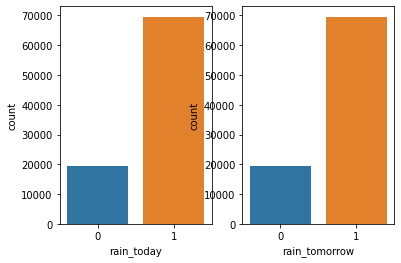

<Figure size 1440x1440 with 0 Axes>

In [28]:
fig, ax =plt.subplots(1,2)
print(rain.rain_today.value_counts())
print(rain.rain_tomorrow.value_counts())

plt.figure(figsize=(20,20))
sns.countplot(data=rain,x='rain_today',ax=ax[0])
sns.countplot(data=rain,x='rain_tomorrow',ax=ax[1])

In [29]:
# Extact numerical features
num_col=rain.select_dtypes(include=np.number).columns.to_list()
len(num_col)

11

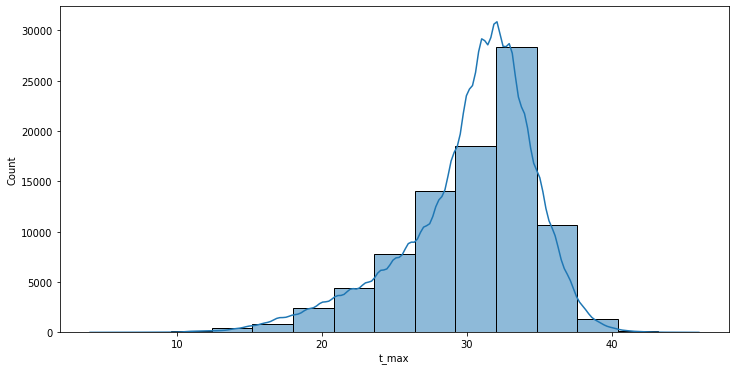

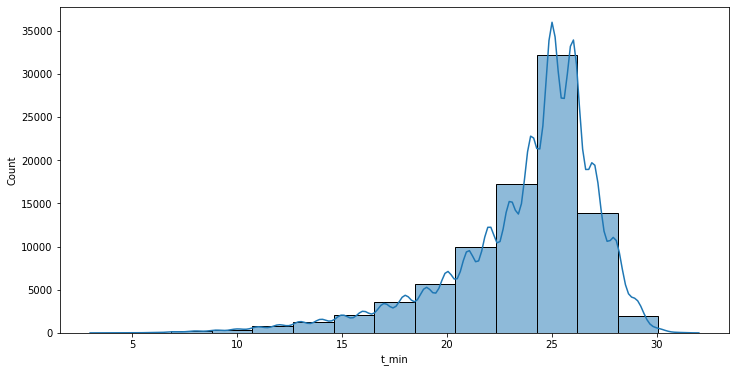

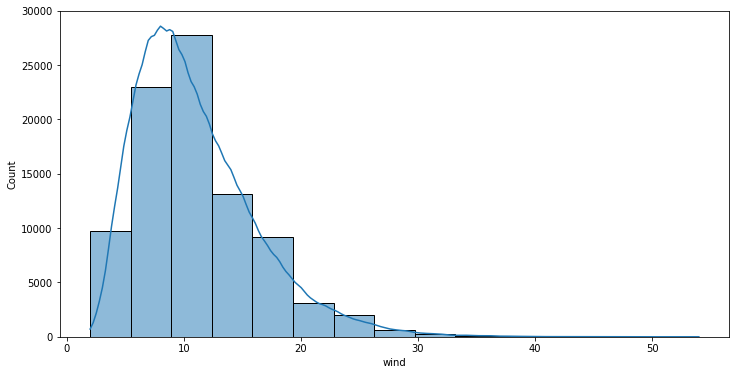

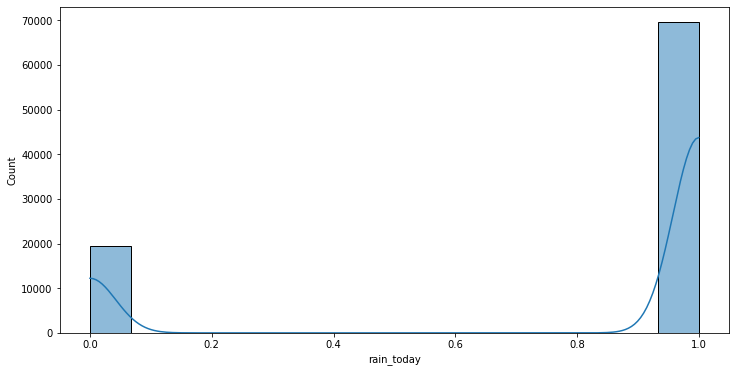

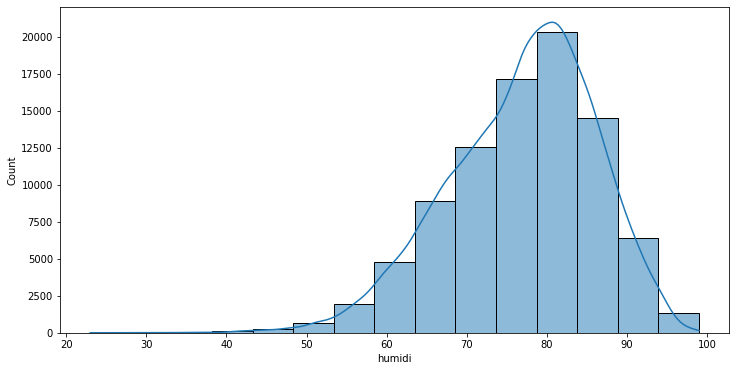

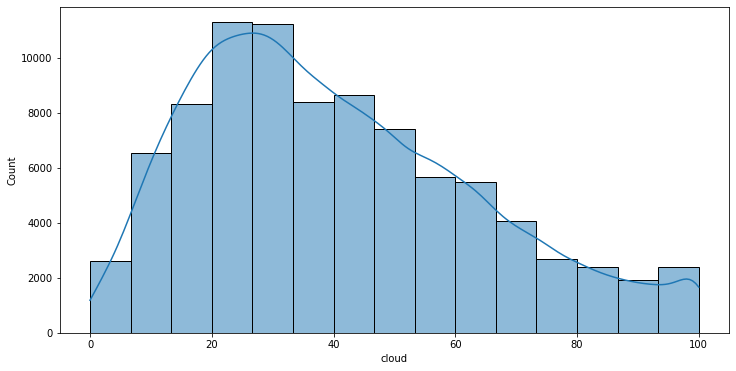

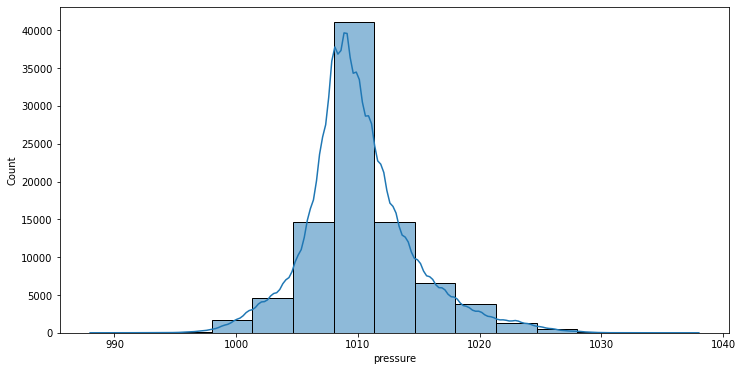

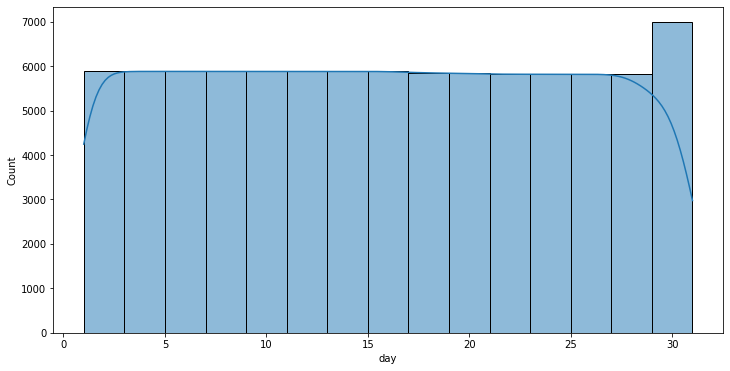

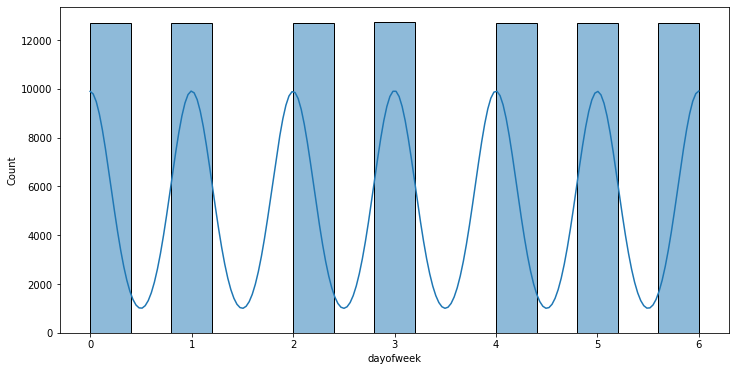

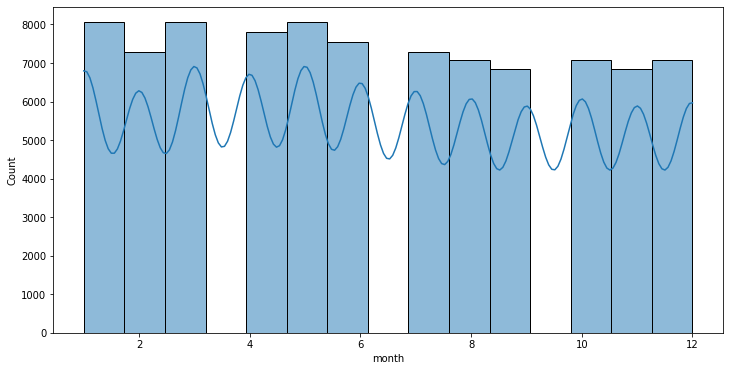

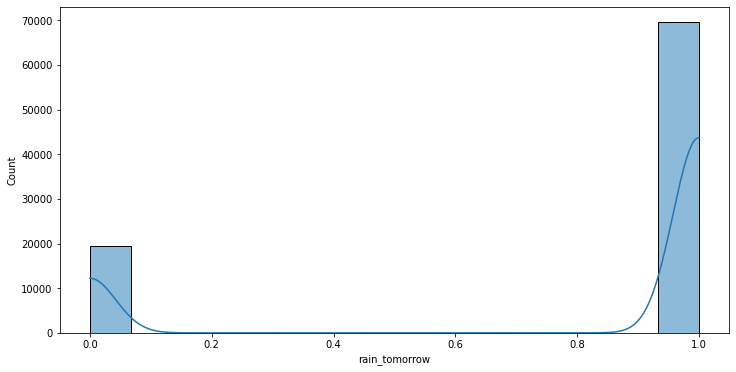

In [30]:
for i in num_col:
    plt.figure(figsize=(12,6));
    sns.histplot(rain[i],bins=15, kde=True);

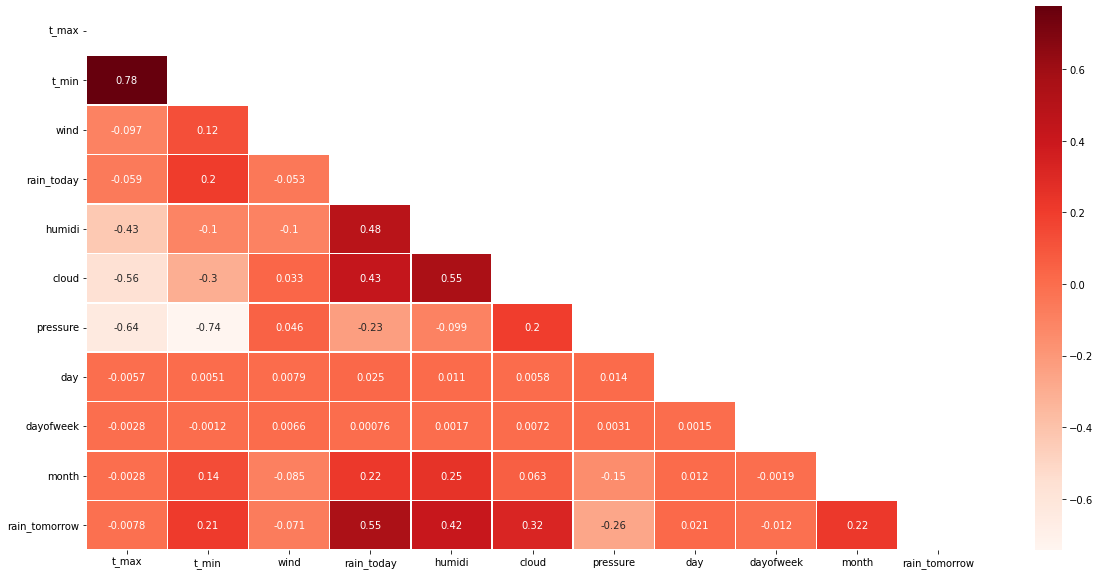

In [31]:
# Checking for the correlation between eachother by using heatmap
fig, ax = plt.subplots(figsize=(20,10))
mask = np.triu(np.ones_like(rain.corr(), dtype=np.bool_))
sns.heatmap(rain.corr(), annot=True, cmap="Reds", mask=mask, linewidth=0.5)

The following pairs of features are having high correlation between them:

- t_min and t_max
- rain_today and rain_tomorrow
- humidi and rain_today
- humidi and rain_tomorrow
- cloud and rain_today
- cloud and humidi
- cloud and rain_tomorrow

### Remove date column

In [32]:
rain = rain.drop('date', axis=1)
rain

,province,t_max,t_min,wind,wind_d,rain_today,humidi,cloud,pressure,day,dayofweek,month,rain_tomorrow
0,Bac Lieu,27,22,17,NNE,1,90,71,1010.0,1.0,3.0,1.0,1
117,Bac Lieu,28,22,15,ENE,1,85,61,1010.0,2.0,4.0,1.0,1
91,Bac Lieu,23,21,9,ESE,1,91,77,1011.0,3.0,5.0,1.0,1
104,Bac Lieu,27,21,9,E,1,86,32,1011.0,4.0,6.0,1.0,0
39,Bac Lieu,29,22,10,SE,0,81,25,1010.0,5.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79425,Tuy Hoa,33,27,17,WSW,1,60,52,1006.0,13.0,6.0,6.0,0
79503,Tuy Hoa,34,26,12,WSW,0,58,28,1007.0,14.0,0.0,6.0,1
79465,Tuy Hoa,35,25,11,SW,1,61,37,1006.0,15.0,1.0,6.0,1
79477,Tuy Hoa,31,26,12,WSW,1,73,68,1008.0,16.0,2.0,6.0,1


#### Label Encoding:

In [33]:
rain.province.unique()

array(['Bac Lieu', 'Ben Tre', 'Bien Hoa', 'Buon Me Thuot', 'Ca Mau',
       'Cam Pha', 'Cam Ranh', 'Ho Chi Minh City', 'Hoa Binh', 'Hong Gai',
       'Hue', 'Long Xuyen', 'My Tho', 'Nam Dinh', 'Tam Ky', 'Tan An',
       'Thai Nguyen', 'Thanh Hoa', 'Tra Vinh', 'Tuy Hoa'], dtype=object)

In [34]:
scale_mapper_province = {'Bac Lieu':0, 'Ben Tre':1, 'Bien Hoa':2, 'Buon Me Thuot':3, 'Ca Mau':4,
       'Cam Pha':5, 'Cam Ranh':6, 'Can Tho':7, 'Chau Doc':8, 'Da Lat':9, 'Ha Noi':10,
       'Hai Duong':11, 'Hai Phong':12, 'Hanoi':13, 'Ho Chi Minh City':14, 'Hoa Binh':15,
       'Hong Gai':16, 'Hue':17, 'Long Xuyen':18, 'My Tho':19, 'Nam Dinh':20, 'Nha Trang':21,
       'Phan Rang':22, 'Phan Thiet':23, 'Play Cu':24, 'Qui Nhon':25, 'Rach Gia':26,
       'Soc Trang':27, 'Tam Ky':28, 'Tan An':29, 'Thai Nguyen':30, 'Thanh Hoa':31,
       'Tra Vinh':32, 'Tuy Hoa':33, 'Uong Bi':34, 'Viet Tri':35, 'Vinh':36, 'Vinh Long':37,
       'Vung Tau':38, 'Yen Bai':39}
rain["province"] = rain["province"].replace(scale_mapper_province)

rain

,province,t_max,t_min,wind,wind_d,rain_today,humidi,cloud,pressure,day,dayofweek,month,rain_tomorrow
0,0,27,22,17,NNE,1,90,71,1010.0,1.0,3.0,1.0,1
117,0,28,22,15,ENE,1,85,61,1010.0,2.0,4.0,1.0,1
91,0,23,21,9,ESE,1,91,77,1011.0,3.0,5.0,1.0,1
104,0,27,21,9,E,1,86,32,1011.0,4.0,6.0,1.0,0
39,0,29,22,10,SE,0,81,25,1010.0,5.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79425,33,33,27,17,WSW,1,60,52,1006.0,13.0,6.0,6.0,0
79503,33,34,26,12,WSW,0,58,28,1007.0,14.0,0.0,6.0,1
79465,33,35,25,11,SW,1,61,37,1006.0,15.0,1.0,6.0,1
79477,33,31,26,12,WSW,1,73,68,1008.0,16.0,2.0,6.0,1


In [35]:
rain.wind_d.unique()

array(['NNE', 'ENE', 'ESE', 'E', 'SE', 'NE', 'S', 'SSW', 'SSE', 'SW',
       'WSW', 'W', 'WNW', 'NW', 'N', 'NNW'], dtype=object)

In [36]:
scale_mapper_wind_d = {'NNE':0, 'ENE':1, 'ESE':2, 'E':3, 'SE':4, 'NE':5, 'S':6, 'SSW':7, 'SSE':8, 'SW':9,
       'WSW':10, 'W':11, 'WNW':12, 'NW':13, 'N':14, 'NNW':15}
rain["province"] = rain["province"].replace(scale_mapper_wind_d)

rain

,province,t_max,t_min,wind,wind_d,rain_today,humidi,cloud,pressure,day,dayofweek,month,rain_tomorrow
0,0,27,22,17,NNE,1,90,71,1010.0,1.0,3.0,1.0,1
117,0,28,22,15,ENE,1,85,61,1010.0,2.0,4.0,1.0,1
91,0,23,21,9,ESE,1,91,77,1011.0,3.0,5.0,1.0,1
104,0,27,21,9,E,1,86,32,1011.0,4.0,6.0,1.0,0
39,0,29,22,10,SE,0,81,25,1010.0,5.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79425,33,33,27,17,WSW,1,60,52,1006.0,13.0,6.0,6.0,0
79503,33,34,26,12,WSW,0,58,28,1007.0,14.0,0.0,6.0,1
79465,33,35,25,11,SW,1,61,37,1006.0,15.0,1.0,6.0,1
79477,33,31,26,12,WSW,1,73,68,1008.0,16.0,2.0,6.0,1


In [37]:
categorical_features = [column_name for column_name in rain.columns if rain[column_name].dtype =="O"]
categorical_features

['wind_d']

In [38]:
# Convert categorized values to numerical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
rain[categorical_features] =rain[categorical_features].astype('str').apply(le.fit_transform)

In [39]:
rain

,province,t_max,t_min,wind,wind_d,rain_today,humidi,cloud,pressure,day,dayofweek,month,rain_tomorrow
0,0,27,22,17,5,1,90,71,1010.0,1.0,3.0,1.0,1
117,0,28,22,15,1,1,85,61,1010.0,2.0,4.0,1.0,1
91,0,23,21,9,2,1,91,77,1011.0,3.0,5.0,1.0,1
104,0,27,21,9,0,1,86,32,1011.0,4.0,6.0,1.0,0
39,0,29,22,10,9,0,81,25,1010.0,5.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79425,33,33,27,17,15,1,60,52,1006.0,13.0,6.0,6.0,0
79503,33,34,26,12,15,0,58,28,1007.0,14.0,0.0,6.0,1
79465,33,35,25,11,12,1,61,37,1006.0,15.0,1.0,6.0,1
79477,33,31,26,12,15,1,73,68,1008.0,16.0,2.0,6.0,1


In [40]:
# Preview changes
rain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88983 entries, 0 to 79516
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   province       88983 non-null  int64  
 1   t_max          88983 non-null  int64  
 2   t_min          88983 non-null  int64  
 3   wind           88983 non-null  int64  
 4   wind_d         88983 non-null  int64  
 5   rain_today     88983 non-null  int64  
 6   humidi         88983 non-null  int64  
 7   cloud          88983 non-null  int64  
 8   pressure       88983 non-null  float64
 9   day            88983 non-null  float64
 10  dayofweek      88983 non-null  float64
 11  month          88983 non-null  float64
 12  rain_tomorrow  88983 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 11.5 MB


#### Splitting Data into X and Y:

In [41]:
# Let's first drop target variable
x = rain.drop(['rain_tomorrow'], axis = 1)
y = rain['rain_tomorrow']

x.shape

(88983, 12)

#### Feature Scaling:

In [42]:
# from sklearn.preprocessing import StandardScaler
# sc=StandardScaler()
# x=sc.fit_transform(x)

#### Spliting Dataset into Traning set and Test set

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [44]:
X_test

,province,t_max,t_min,wind,wind_d,rain_today,humidi,cloud,pressure,day,dayofweek,month
68056,32,30,25,11,0,1,78,34,1008.0,21.0,1.0,12.0
84962,6,32,27,12,8,1,76,12,1009.0,1.0,3.0,9.0
66257,32,30,25,15,15,1,79,55,1007.0,24.0,6.0,7.0
58313,4,32,25,8,2,1,77,24,1012.0,29.0,1.0,10.0
15153,1,35,28,15,2,1,62,33,1010.0,30.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
56904,4,30,26,7,15,1,85,52,1010.0,1.0,2.0,7.0
84283,6,31,26,10,12,1,82,13,1010.0,30.0,1.0,6.0
2260,0,34,29,8,8,1,64,37,1009.0,18.0,6.0,5.0
57496,4,33,27,17,15,1,67,31,1008.0,18.0,5.0,8.0


## Random Forest

#### Model Training:
- Model: Random Forest
- Advantages: Reduction in over-fitting and random forest classifier is more accurate than decision trees in most cases.
- Disadvantages: Slow real time prediction, difficult to implement, and complex algorithm.

In [45]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100,random_state=0)
classifier.fit(X_train,Y_train)

RandomForestClassifier(random_state=0)

In [46]:
classifier.score(X_train,Y_train)

0.9999719045879808

In [47]:
Y_pred=classifier.predict(X_test)

In [48]:
print(Y_pred)

[1 1 1 ... 1 1 1]


In [49]:
from sklearn.metrics import accuracy_score
print("The accuracy of Random Forest algorithm:", accuracy_score(Y_test,Y_pred)*100, "%")
print("F1 score for Random Forest is :",f1_score(Y_test, Y_pred)*100, "%")

The accuracy of Random Forest algorithm: 88.45872899926954 %
F1 score for Random Forest is : 92.78031634446397 %


In [72]:
import joblib

joblib.dump(classifier, "weather_random_forest.joblib")

['weather_random_forest.joblib']

## Logistic Regression

In [50]:
model = LogisticRegression(max_iter=500)
model.fit(X_train, Y_train)
predicted=model.predict(X_test)

conf = confusion_matrix(Y_test, predicted)
print ("The accuracy of Logistic Regression is : ", accuracy_score(Y_test, predicted)*100, "%")
print()
print("F1 score for logistic regression is :",f1_score(Y_test, predicted,)*100, "%")

The accuracy of Logistic Regression is :  85.41327189975839 %

F1 score for logistic regression is : 90.94018287150136 %


## Gaussian Naive Bayes

In [51]:
model = GaussianNB()
model.fit(X_train, Y_train)
  
predicted = model.predict(X_test)
  
print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(Y_test, predicted)*100, "%")
print()
print("F1 score for Gaussian Naive Bayes is :",f1_score(Y_test, predicted,)*100, "%")

The accuracy of Gaussian Naive Bayes model is :  83.92425689722987 %

F1 score for Gaussian Naive Bayes is : 89.54274644541101 %


## Bernoulli Naive Bayes

In [52]:
model = BernoulliNB()
model.fit(X_train, Y_train)
  
predicted = model.predict(X_test)
  
print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(Y_test, predicted)*100, "%")
print()
print("F1 score for Bernoulli Naive Bayes is :",f1_score(Y_test, predicted,)*100, "%")

The accuracy of Gaussian Naive Bayes model is :  84.51424397370343 %

F1 score for Bernoulli Naive Bayes is : 90.1062607696726 %


## kNN

In [53]:
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
  
predicted = model.predict(X_test)
  
print("The accuracy of kNN model is : ", accuracy_score(Y_test, predicted)*100, "%")
print()
print("F1 score for kNN is :",f1_score(Y_test, predicted,)*100, "%")

The accuracy of kNN model is :  84.30072484126538 %

F1 score for kNN is : 90.24100593782745 %


## Decision Tree

In [54]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
  
predicted = model.predict(X_test)
  
print("The accuracy of Decision Tree model is : ", accuracy_score(Y_test, predicted)*100, "%")
print()
print("F1 score for Decision Tree is :",f1_score(Y_test, predicted,)*100, "%")

The accuracy of Decision Tree model is :  83.32865089621846 %

F1 score for Decision Tree is : 89.28455343277113 %


## XGBoost

In [66]:
xgbc = XGBClassifier(objective='binary:logistic')
xgbc.fit(X_train,Y_train)
predicted = xgbc.predict(X_test)
print ("The accuracy of XGBoost is : ", accuracy_score(Y_test, predicted)*100, "%")
print()
print("F1 score for XGBoost is :",f1_score(Y_test, predicted,)*100, "%")

The accuracy of XGBoost is :  86.02573467438333 %

F1 score for XGBoost is : 91.28194342202124 %


## ANN Artifical Neural Network

In [56]:
#Early stopping
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True,
)

# Initialising the NN
model = Sequential()

# layers

model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
model.add(Dense(units = 32, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(units = 16, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
opt = Adam(learning_rate=0.00009)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Train the ANN
history = model.fit(X_train, Y_train, batch_size = 32, epochs = 15, callbacks=[early_stopping], validation_split=0.2)#epochs = 150

Epoch 1/15
1780/1780 [==============================] - 6s 3ms/step - loss: 0.5507 - accuracy: 0.7817 - val_loss: 0.5133 - val_accuracy: 0.7802
Epoch 2/15
1780/1780 [==============================] - 5s 3ms/step - loss: 0.5062 - accuracy: 0.7820 - val_loss: 0.4357 - val_accuracy: 0.7802
Epoch 3/15
1780/1780 [==============================] - 5s 3ms/step - loss: 0.4487 - accuracy: 0.7820 - val_loss: 0.4166 - val_accuracy: 0.7802
Epoch 4/15
1780/1780 [==============================] - 5s 3ms/step - loss: 0.4354 - accuracy: 0.7820 - val_loss: 0.4062 - val_accuracy: 0.7802
Epoch 5/15
1780/1780 [==============================] - 6s 3ms/step - loss: 0.4237 - accuracy: 0.7820 - val_loss: 0.3909 - val_accuracy: 0.7802
Epoch 6/15
1780/1780 [==============================] - 5s 3ms/step - loss: 0.4112 - accuracy: 0.7820 - val_loss: 0.3841 - val_accuracy: 0.7802
Epoch 7/15
1780/1780 [==============================] - 6s 3ms/step - loss: 0.4049 - accuracy: 0.7820 - val_loss: 0.3804 - val_accuracy:

Plotting training and validation loss over epochs

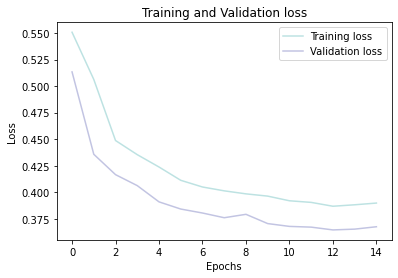

In [57]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['loss']], "#BDE2E2", label='Training loss')
plt.plot(history_df.loc[:, ['val_loss']],"#C2C4E2", label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

Plotting training and validation accuracy over epochs

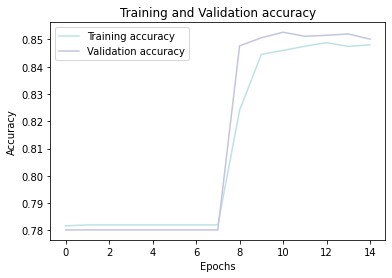

In [58]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#BDE2E2", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']], "#C2C4E2", label='Validation accuracy')

plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [59]:
# Predicting the test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

557/557 [==============================] - 1s 1ms/step


In [60]:
print(y_pred)

[[ True]
 [ True]
 [ True]
 ...
 [ True]
 [ True]
 [ True]]


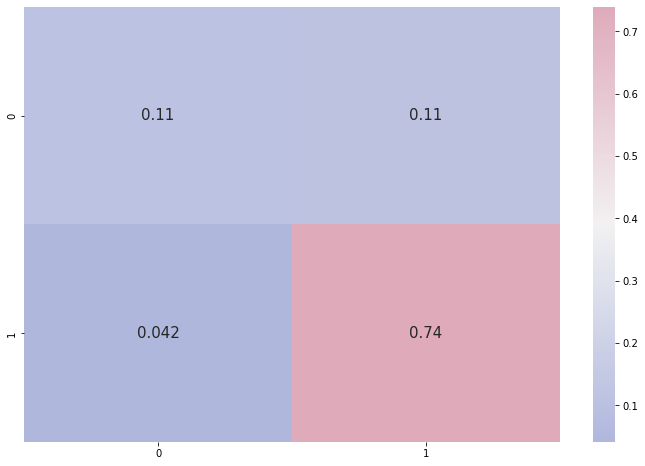

In [61]:
# confusion matrix
cmap1 = sns.diverging_palette(260,-10,s=50, l=75, n=5, as_cmap=True)
plt.subplots(figsize=(12,8))
cf_matrix = confusion_matrix(Y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), cmap = cmap1, annot = True, annot_kws = {'size':15})

In [62]:
print("The accuracy of ANN model is : ", accuracy_score(Y_test, y_pred)*100, "%")
print()
print("F1 score for ANN is :",f1_score(Y_test, y_pred,)*100, "%")

The accuracy of ANN model is :  84.78957127605776 %

F1 score for ANN is : 90.67291458498433 %


## Show Random Forest prediction

In [63]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [64]:
X_test

,province,t_max,t_min,wind,wind_d,rain_today,humidi,cloud,pressure,day,dayofweek,month
68056,32,30,25,11,0,1,78,34,1008.0,21.0,1.0,12.0
84962,6,32,27,12,8,1,76,12,1009.0,1.0,3.0,9.0
66257,32,30,25,15,15,1,79,55,1007.0,24.0,6.0,7.0
58313,4,32,25,8,2,1,77,24,1012.0,29.0,1.0,10.0
15153,1,35,28,15,2,1,62,33,1010.0,30.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
56904,4,30,26,7,15,1,85,52,1010.0,1.0,2.0,7.0
84283,6,31,26,10,12,1,82,13,1010.0,30.0,1.0,6.0
2260,0,34,29,8,8,1,64,37,1009.0,18.0,6.0,5.0
57496,4,33,27,17,15,1,67,31,1008.0,18.0,5.0,8.0


In [73]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17797 entries, 68056 to 15206
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   province    17797 non-null  int64  
 1   t_max       17797 non-null  int64  
 2   t_min       17797 non-null  int64  
 3   wind        17797 non-null  int64  
 4   wind_d      17797 non-null  int64  
 5   rain_today  17797 non-null  int64  
 6   humidi      17797 non-null  int64  
 7   cloud       17797 non-null  int64  
 8   pressure    17797 non-null  float64
 9   day         17797 non-null  float64
 10  dayofweek   17797 non-null  float64
 11  month       17797 non-null  float64
dtypes: float64(4), int64(8)
memory usage: 1.8 MB


In [70]:
Xnew = [[37,37,24,11,0,0,45,10,1014,23,6,2]]
ynew = classifier.predict(Xnew)
# show the inputs and predicted outputs
for i in range(len(Xnew)):
	print("X=%s, Predicted=%s" % (Xnew[i], ynew[i]))

X=[37, 37, 24, 11, 0, 0, 45, 10, 1014, 23, 6, 2], Predicted=0
